# Model Evaluation / Comparison

In [1]:
from model_comparison import plot_column_from_csv, evaluate_models, format_model_output

In [2]:
models_to_compare = [
    'models/templateGPT/trained/templateGPT_1m_short_and_thicc',
    'models/fractal-head-attention/trained/FHA_1m_short_and_thicc'
]

### first up we'll look at loss curves
notice that even with a log scale I had to splice out the first 10% to make the lines distinct

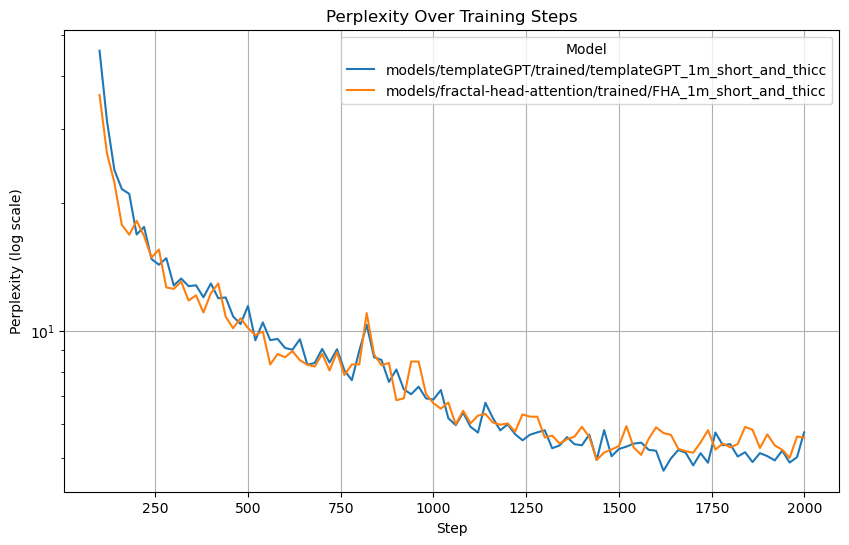

In [3]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True, trim_percentage=5)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output

In [8]:
topk = 5
results = evaluate_models(models_to_compare, topk)
print()

# Display the results for each model
for name, data in results.items():
    format_model_output(name, data, topk, data['tokenizer'], data['correct_indices'])

Found cached dataset json (/Users/tunadorable/.cache/huggingface/datasets/noanabeshima___json/noanabeshima--TinyStoriesV2-226173b7dd235c68/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


934.976 K parameters 
 ModelConfig(dim=64, device='cpu', tokenizer='bpe', vocab_len=8192, num_layers=4, second_resid_norm=False, mlp_hidden_mult=8, mlp_bias=False, mlp_nonlinearity='SiLU', mlp_gated=True, num_q_heads=8, num_kv_heads=1, head_dim=32, theta=10000, max_seq_len=512, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06, max_batch_size=1)
918.592 K parameters 
 ModelConfig(dim=64, device='cpu', tokenizer='bpe', vocab_len=8192, num_layers=4, second_resid_norm=False, mlp_hidden_mult=8, mlp_bias=False, mlp_nonlinearity='SiLU', mlp_gated=True, num_q_heads=3, num_kv_heads=1, head_dim=64, theta=10000, max_seq_len=512, fractal_split=2, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06, max_batch_size=1)

Model: models/templateGPT/trained/templateGPT_1m_short_and_thicc
  - Top-5 Accuracy: 72.07%
True	Predicted
Once	['Once', 'On', 'Lily', 'To', 'Ann']
 	['', ', ', ', "', ' "', '. ']
upon	['upon', 'th', 'exp', '

# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms